### We will First import important files and then we will do certain steps
1. First we will train and test the samples
2. Then will check the shapes of both train and test od both X and y as well
3. The for making Neural Network to classify the digits from 0 to 9 we have to make each trained 28x28 matrix into a single matrix
4. then we will Apply neural networks as
### Implimenting Neural Network Steps 
1. First we will define Sequential Model from keras and we will define the input layer total shape and output number as a 'Dense' .
2. Second we will compile our Made neural Network model.
3. Third we will fit the model which we have compiled with the certain parameteres such as 'loss','optimizers' and etc

![](digits_nn.jpg)}

# Using Digits Data sets only for Learning Purpose

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


2024-07-18 14:19:00.771646: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [5]:
len(X_train)

60000

In [6]:
len(X_test)

10000

In [7]:
X_train[0].shape

(28, 28)

In [8]:
y_train[0]

5

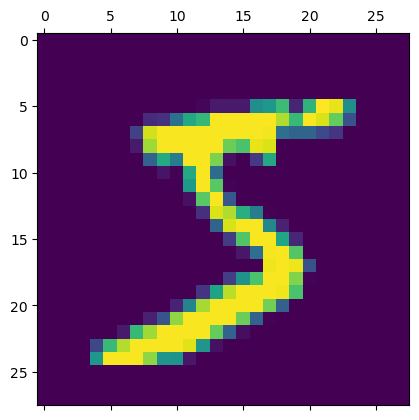

In [9]:
plt.matshow(X_train[0])

In [10]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [11]:
 X_train.shape

(60000, 28, 28)

In [12]:
X_train = X_train/255
X_test  = X_test/255

6000 is total numbers of data and each digit have 28 x 28 matrix

So first we will make these 28 x 28 Matrix into a single columns matrix

In [13]:
single_matrix_for_X_train=X_train.reshape(len(X_train),28*28)# now we are converting this 28*28 matrix into a 1*1 matric
single_matrix_for_X_test=X_test.reshape(len(X_test),28*28)# now we are converting this 28*28 matrix into a 1*1 matric

In [14]:
single_matrix_for_X_train.shape

(60000, 784)

In [15]:
single_matrix_for_X_test.shape

(10000, 784)

In [16]:
#First we will define Sequential Model from keras and we will define the input layer total shape and output number as a 'Dense' .
model = keras.Sequential([
     keras.layers.Dense(10,input_shape=(784,),activation='sigmoid') #defining total outputs and total input Shapes you want in input neurals and then output means how many outputs do you want
 ])



/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics = ['accuracy'] 
             )
#2 Compiling the model with some params

In [18]:
#3 Fiting the model with x,y and iterations
model.fit(single_matrix_for_X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8102 - loss: 0.7279
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9125 - loss: 0.3126
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9203 - loss: 0.2886
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9231 - loss: 0.2738
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9253 - loss: 0.2609


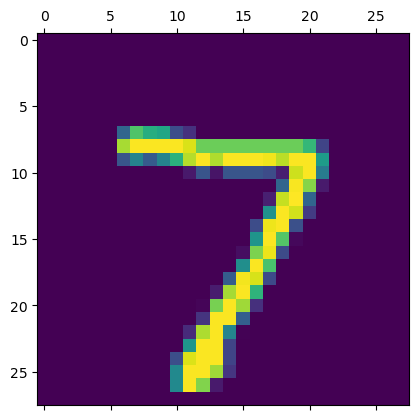

In [23]:
plt.matshow(X_test[0]) #Now for testing we uses 0th index and it shows us output '7'

In [24]:
y_predicted = model.predict(single_matrix_for_X_test) #We predict outputs for all 784 samples 
y_predicted[0]# Then we select 0th index for crosscheck and getting all outputs in single matix only

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([3.1375472e-02, 4.4850486e-07, 5.8866724e-02, 9.5312476e-01,
       2.9664750e-03, 1.3111144e-01, 9.1853838e-07, 9.9973553e-01,
       7.6663956e-02, 7.1658349e-01], dtype=float32)

In [45]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [46]:
np.argmax(y_predicted[0]) #Asking Numpy that which index has the Maximum number. 

7

In [57]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    6,    3,    2,    1,    1],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   4,    9,  934,   17,    7,    5,   10,    9,   32,    5],
       [   4,    0,   19,  913,    0,   37,    1,   10,   13,   13],
       [   2,    2,    6,    1,  916,    0,    5,    4,    6,   40],
       [  10,    2,    7,   20,    8,  807,    6,    4,   20,    8],
       [  13,    3,   11,    1,    8,   29,  888,    2,    3,    0],
       [   1,    9,   24,    6,    9,    1,    0,  931,    1,   46],
       [   7,   13,    7,   23,   10,   42,    8,    9,  830,   25],
       [  10,    7,    2,    9,   24,    8,    0,   10,    4,  935]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

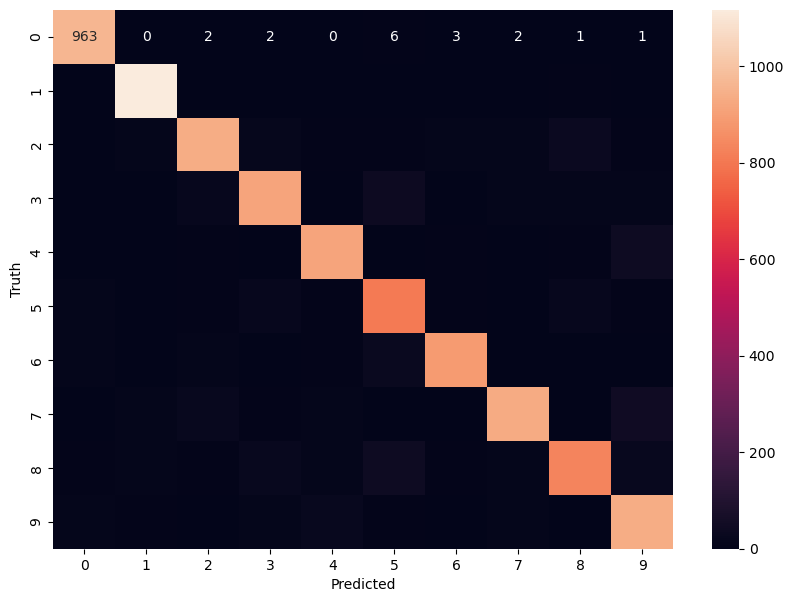

# Using Hiddden layers

In [62]:
model = keras.Sequential([
     keras.layers.Dense(100,input_shape=(784,),activation='relu'),# input , output layer
    keras.layers.Dense(10,activation='sigmoid')#Hidden layer
 ])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics = ['accuracy'] 
             )
model.fit(single_matrix_for_X_train, y_train, epochs=5)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8723 - loss: 0.4532
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9612 - loss: 0.1329
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9734 - loss: 0.0896
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9806 - loss: 0.0663
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9832 - loss: 0.0537


In [67]:
#Storing all predicted samples which are for testing in 'y_predicted'
y_predicted = model.predict(single_matrix_for_X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [73]:
y_predicted[5] #Testing 0th element for normal cross checking .

array([3.2721192e-04, 9.9942410e-01, 5.6000142e-03, 8.9465883e-03,
       9.0688337e-03, 4.3612087e-04, 2.0293512e-05, 3.3715823e-01,
       2.7072724e-02, 4.4643492e-04], dtype=float32)

Now check which element among this are having Maximum Output 
answer is : 9.9994 which is 1rst element that means y_predicted[5]=1